<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

# Data Wrangling ASG2, Ambrish Krishna Muralitharan, S10223486G<a id="top"></a>

## Table of Contents

### 1.	[Introduction with Value Based Problem Statement](#part1)
   - [1.1 Project Objectives](#part1.1)
       
       
### 2.	[Problem Formulation](#part2) 
   - [2.1 Load and Explore Data](#part2.1)
   - [2.2 Prediction Problem](#part2.2)
   
   
### 3.	[Data Wrangling](#part3) 
   - [3.1 Dropping and Renaming of Data](#part3.1)
   - [3.2 Creation of Time Series Data](#part3.2)
   - [3.3 Extraction of Features](#part3.3)
   - [3.4 Merging of Tables](#part3.4)
   - [3.5 Filtering of Tables](#part3.5)


### 4.  [Data Cleansing and Transformation](#part4) 
   - [4.1 Missing Values and Outliers](#part4.1)
   - [4.2 Train and Test Split](#part4.2)
   - [4.3 Numerical Data](#part4.3)
       - [4.3.1 Before Transformation](#part4.3.1)       
       - [4.3.2 After Transformation](#part4.3.2)
   - [4.4 Categorical Data](#part4.4)
   - [4.5 Variable Discretization/Binning](#part4.5)
   - [4.6 Feature Scaling](#part4.6)


### 5.  [Machine Learning Model](#part5)
   - [5.1 Count of Rows and Columns](#part5.1)  
   - [5.2 Naive Baseline Model](#part5.2)
   - [5.3 Linear Regression Model](#part5.3)
   
### 6. [Predictions](#part6)
   
       
### 7. [Summary and Further Improvements](#part7)

# 1. Introduction with Value Based Problem Statement <a id="part1"></a>
[Back to top](#top)

Over the years, the use of Machine Learning has proved to be an effective and essential metric to discover patterns, create models and make predictions. It has become more prominent in various sectors of work such as Medical Science, Information Technology and even Sports. One such Sport that utilises and benefits greatly through the use of Machine Learning is Formula One. Formula One is a sport that is known for its incorporation of Data to help improve the performance of a car, be it regarding lap time, top speed, power unit output and efficiency, etc.

Hence, as data plays a big part in this sport, I wanted to see if the data compiled can accurately predict which position each car finishes in for a race using the dataset provided for this Assignment that consists of Formula One data compiled from the year 1950 to 2022. I will be using a Linear Regression model to showcase the results that I have obtained.

## 1.1 Project Objectives <a id="part1.1"></a>
[Back to top](#top)

In this assignment we will extract the data from a real-life database, wrangle and prepare the data to solve a prediction problem using either Regression methods or Classification methods

• To extract data from a database, explore the data and formulate a prediction problem

• To create a tabular data table from multiple tables based on the formulated problem

• To wrangle and prepare the data ready for modeling, use the prepared data to build and evaluate a simple machine learning model

• To document the process, analysis, comparison and findings

## 2. Problem Formulation<a id="part2"></a> 

[Back to top](#top)

 ### 2.1 Load and Explore Data <a id="part2.1"></a> 
 [Back to top](#top)

First, before exploring the data, let's import the required libraries needed to accomplish all the tasks required for this report. They are separated into 10 parts. The 10 parts are as follows: Import Packages, Datetime, Visuals, Train and Test Split, Variable Discretization/Binning, Encoding of Categorical Variables, Numerical Transformation, Feature Scaler and last but not least, Linear Regression.

In [94]:
# import the packages

import pandas as pd
import numpy as np
from pprint import pprint
import requests
import math
from sklearn.metrics import precision_score

#datetime
from dateutil.relativedelta import *

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# train&test split
from sklearn.model_selection import train_test_split

# for variable discretization/binning
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


#for encoding of categorical variables
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder

# for numerical transformation
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# Linear Regression
from sklearn.linear_model import LinearRegression

After importing all the packages, we can then begin loading the data from the csv(comma separated values) file to being Data Exploration. Upon loading the data, we will then use the function data.head() to get a preview of the dataset that we are going to be working with. This will provide us with better insight as to what data each variable in the dataset contains. There is a total of 13 csv tables that have been provided for this assignment, out of which only 6 will be used. Then, we will use the data.info() function to find out the data types of each variable and the number of rows of non-null data they each contain.

### Constructor Standings

In [2]:
con_stan = pd.read_csv('./data/constructor_standings_mod.csv')
print(con_stan.shape)

(12716, 7)


In [3]:
con_stan.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [4]:
con_stan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12716 entries, 0 to 12715
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12716 non-null  int64  
 1   raceId                  12716 non-null  int64  
 2   constructorId           12716 non-null  int64  
 3   points                  12716 non-null  float64
 4   position                12716 non-null  int64  
 5   positionText            12716 non-null  object 
 6   wins                    12716 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 695.5+ KB


As seen above in the preview, there are a total of 7 variables present in the dataset which are, constructorStandingsId, raceId, constructorId, points, position, positionText and wins. 

Each variable represents a particular dimension of the Constructor Standings table. The variable constructorStandingsId represents the unique ID of each Constructor's standing. RaceId refers to the unique ID of each race. constructorId is the unique ID of each constructor present. Points refers to the points attained by each constructor at the end of a race. Position refers to the position the constructor placed in for each race in the form of an integer while PositionText refers to the same thing but in a string format instead. Wins refers to the number of wins for each constructor at the end of each race.

We can also see the number of null values for each variable present in the table. As seen above, none of the variables have any null values in them.

### Constructors

In [5]:
con = pd.read_csv('./data/constructors_mod.csv')
print(con.shape)

(211, 5)


In [6]:
con.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [7]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


As seen above in the preview, there are a total of 5 variables present in the dataset which are, constructorId, constructorRef, name, nationality and url. 

Each variable represents a particular dimension of the Constructors table. The variable constructorId is the unique ID for each constructor. ConstuctorRef is the reference string for each Constrcutor. Name refers to the name of each Constructor. Nationality refers to the nation the constructor is from and url is the wikipedia website link for each constructor.

We can also see the number of null values for each variable present in the table. As seen above, none of the variables have any null values in them.

### Driver Standings

In [8]:
dri_stan = pd.read_csv('./data/driver_standings_mod.csv')
print(dri_stan.shape)

(33394, 7)


In [9]:
dri_stan.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0


In [10]:
dri_stan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33394 entries, 0 to 33393
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   driverStandingsId  33394 non-null  int64 
 1   raceId             33394 non-null  int64 
 2   driverId           33394 non-null  int64 
 3   points             33389 non-null  object
 4   position           33394 non-null  int64 
 5   positionText       33394 non-null  object
 6   wins               33394 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


As seen above in the preview, there is a total of 7 variables present in the csv table which are driverStandingsId, raceId, driverId, points, position, positionText and wins.

Each variable represents a particular dimension of the Driver Standings table. The variable driverStandingsId represents the unique ID of each Driver's standing. RaceId refers to the unique ID of each race. driverId is the unique ID of each driver present. Points refers to the points attained by each driver at the end of a race. Position refers to the position the driver placed in for each race in the form of an integer while PositionText refers to the same thing but in a string format instead. Wins refers to the number of wins for each driver at the end of each race.

We can also see the number of null values for each variable present in the table. As seen above, apart from points which has 5 null values, none of the variables have any null values in them.

### Drivers

In [11]:
drivers = pd.read_csv('./data/drivers_mod.csv')
print(drivers.shape)

(854, 9)


In [12]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,7/1/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,10/5/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,27/6/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,29/7/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [13]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


As seen above in the preview, there is a total of 9 variables present in the csv table which are driverId, driverRef, number, code, forename, surname, dob, nationality and	url.

Each variable represents a particular dimension of the Drivers table. The variable driverId refers to the unique ID of each driver. The driverRef variable refers to the reference string of each driver. Number is the permanent driver number. Code is the driver code. Forename and surname refer to the forename and surname of each driver. dob refers to the date of birth of each driver and nationality refers to the nation each driver is from, while url refers to the website link of the respective driver's wikipedia page.

We can also see the number of null values for each variable present in the table. As seen above, none of the variables have any null values in them.

### Races

In [14]:
races = pd.read_csv('./data/races_mod.csv')
print(races.shape)

(1080, 7)


In [15]:
races.head()

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [16]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1070 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 59.2+ KB


As seen above in the preview, there is a total of 7 variables present in the csv table which are raceId, round, circuitId, name, date, time and url.

Each variable represents a particular dimension of the Races table. RaceId refers to the unique race Id. Round refers to the specific round fo each race. CircuitId refers to the unique circuit ID. Name refers to the name of the Grand Prix. Date and time refer to the date and the time that each race occurs, while url refers to the wikipedia page link for each Grand Prix.

We can also see the number of null values for each variable present in the table. As seen above, apart from date which has 10 null values, none of the variables have any null values in them.

### Results

In [17]:
results = pd.read_csv('./data/results_mod.csv')
print(results.shape)

(25399, 18)


In [18]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


In [19]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

As seen above in the preview, there is a total of 18 variables present in the csv table which are resultId, raceId, driverId, constructorId, number, grid, position, positionText, positionOrder, points, laps, time, milliseconds, fastestLap, rank, fastestLapTime, fastestLapSpeed and statusId.

Each variable represents a particular dimension of the Results table. ResultId, raceId, DriverId and constructorId refers to the unique Id for each result, race, driver and constructor respectively. Number refers to the specific driver number of each driver. Grid refers to the starting grid position of each driver. Position refers to the position each driver finishes in for each race in an integer format while positionText refers to the same thing but in a string format instead. positionOrder refers to the position of each driver for oredering purposes. Points refers to the amount of points achieved by each driver for each race. Laps refers to the number of completed laps for each driver. Time refers to the finishing time of each driver. Milliseconds refers to the finishing time in milliseconds. fastestLap refers to Lap number of fastest lap for each driver. Rank is the fastest lap rank. FastestLapTime refers to the time taken to complete the fastest lap of each driver while fastestLapSpeed refers to the fastest speed recorded by each driver for their fastest lap. StatusId refers to the unique ID of the finishing status for each driver.

We can also see the number of null values for each variable present in the table. As seen above, none of the variables have any null values in them.

 ### 2.2 Prediction Problem <a id="part2.2"></a> 
 [Back to top](#top)
 
"What positon does each driver finish in for each race for the 2021 season?"

This is my prediction problem for this Assignment after exploring these 6 csv Tables. I will be using a Regression model to aid me in my predictions.Out of the 13 csv tables provided for this assignment, only 6 of them will be used to solve my prediction problem. These 6 tables are Constructor Standings, Constructors, Driver Standings, Drivers, Races and Results.
 
 Before proceeding on to create the Machine Learning Model, first we need to conduct Data Wrangling before conducting Data Cleansing and Transformation.

## 3. Data Wrangling <a id="part3"></a> 
[Back to top](#top)

Data wrangling refers to the process of organzing, transforming, mapping and combining datasets in order to make it easier to analyze said dataset. Data Wrangling enables us to handle data in faster, produce more accurate results, and eventually allow us to make better decisions. Thus, Data Wrangling is an essential and effective task that is needed to be done, no matter the case, to attain a more likely chance of a good and successful project. The Data Wrangling techniques used differs from one project to another, depending on the dataset used and the main aim of the particular project. For this assignment, we will conduct the following steps:

- Dropping and Renaming of Data
- Creation of Time Series Data
- Extraction of Features
- Merging of Tables
- Filtering of Tables

### 3.1 Dropping and Renaming of Data <a id="part3.1"></a> 
[Back to top](#top)

Dropping and Renaming of Data is an essential step that is needed to be done for not only better understanding of the data but also to get a smaller dataset that can lead to faster runtime and even more accurate results.

Despite using the 6 tables of Constructor Standings, Constructors, Driver Standings, Drivers, Races and Results, there are still some columns present in each dataset that prove to be of no use in the leadup to achieve the main goal which is the prediction problem. Thus, it is essential to drop said columns. Hence, as there are fewer columns left overall, it will become easier for the codes to be processed and the results will be achieved faster and are likely to be more accurate.

Renaming of Columns is also another essential step of Data Wrangling as there is a possibility that multiple tables could have columns of the same name but differ in terms of the data they represent. Thus, by renaming these columns, it will become easier to distinguish each column from one another, in turn boosting the understandability of the dataset.

### Races

In [20]:
races = races.drop(['name', 'time', 'url'] ,axis = 1)

races.head()

,raceId,round,circuitId,date
0,1,1,1,3/29/2009
1,2,2,2,4/5/12009
2,3,3,17,4/19/2009
3,4,4,3,4/26/2009
4,5,5,4,5/10/2009


For the Races table, the name, time and url columns that were initially present in the dataset have been dropped as they are not necessary. Then, a preview of the Races table is shown to prove that the columns have indeed been dropped.

### Constructor Standings

In [21]:
con_stan = con_stan.drop(['constructorStandingsId', 'positionText'] ,axis = 1)

con_stan = con_stan.rename(columns = {'points': 'con_stan_points', 'position': 'con_stan_position',
                           'wins': 'con_stan_wins'})

con_stan.head()

,raceId,constructorId,con_stan_points,con_stan_position,con_stan_wins
0,18,1,14.0,1,1
1,18,2,8.0,3,0
2,18,3,9.0,2,0
3,18,4,5.0,4,0
4,18,5,2.0,5,0


For the Constructor Standings Table, the constructorStandingsId and positionText columns that were initially present in the table have been dropped as they aren't necessary. The columns points, position and wins have also been renamed to con_stan_points, con_stan_position and con_stan_wins respectively as there are other tables with the same column names. Then a preview of the Constructor Standings Table is shown to prove that the columns have indeed been dropped and renamed.

### Constructors

In [22]:
con = con.drop(['name', 'nationality', 'url'] ,axis = 1)

con.head()

,constructorId,constructorRef
0,1,mclaren
1,2,bmw_sauber
2,3,williams
3,4,renault
4,5,toro_rosso


For the Constructors table, the name, nationality and url columns that were initally present in the table have been dropped as they are unnecessary. Then a preview of the Constructors table is shown to prove that the columns have indeed been dropped.

### Driver Standings

In [23]:
dri_stan['points'] = dri_stan['points'].replace('O', '0')

In [24]:
dri_stan = dri_stan.drop(['driverStandingsId', 'positionText'] ,axis = 1)

dri_stan = dri_stan.rename(columns = {'points': 'dri_stan_points', 'position': 'dri_stan_position',
                           'wins': 'dri_stan_wins'})

dri_stan['dri_stan_points'] = dri_stan['dri_stan_points'].astype(float)

dri_stan.head()

,raceId,driverId,dri_stan_points,dri_stan_position,dri_stan_wins
0,18,1,10.0,1,1
1,18,2,8.0,2,0
2,18,3,6.0,3,0
3,18,4,5.0,4,0
4,18,5,4.0,5,0


As there are some 0 values in the points column that have been wrongly labelled with the letter `O`, that has been replaced. For the Driver Standings Table, the driverStandingsId and positionText columns that were initially present in the table have been dropped as they aren't necessary. The columns points, position and wins have also been renamed to dri_stan_points, dri_stan_position and dri_stan_wins respectively as there are other tables with the same column names. Then a preview of the Driver Standings Table is shown to prove that the columns have indeed been dropped and renamed.

### Drivers

In [25]:
drivers['driverName'] = (drivers['forename'] + ' ' + drivers['surname'])

drivers = drivers.drop(['driverRef', 'number', 'code', 'url', 'forename', 'surname'] ,axis = 1)

drivers.head()

,driverId,dob,nationality,driverName
0,1,7/1/1985,British,Lewis Hamilton
1,2,10/5/1977,German,Nick Heidfeld
2,3,27/6/1985,German,Nico Rosberg
3,4,29/7/1981,Spanish,Fernando Alonso
4,5,19/10/1981,Finnish,Heikki Kovalainen


First, a new column called `driverName` has been created which combines the forename and surname columns together. Then, the Drivers table, the driverRef, number, code, url, forename and surname columns that were initally present in the table have been dropped as they are unnecessary. Then a preview of the Drivers table is shown to prove that the columns have indeed been dropped.

### Results

In [26]:
results = results.drop(['resultId', 'number', 'positionText', 'positionOrder', 'points', 'laps', 'time',
              'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed',
              'statusId'] ,axis = 1)

results = results.rename(columns = {'position': 'results_position'})

results.head()

,raceId,driverId,constructorId,grid,results_position
0,18,1,1,1,1
1,18,2,2,5,2
2,18,3,3,7,3
3,18,4,4,11,4
4,18,5,1,3,5


For the Results Table, the resultId, number, positionText, positionOrder, points, laps, time, milliseconds, fastestLap, rank, fastestLapTime, fastestLapSpeed and StatusId columns that were initially present in the table have been dropped as they aren't necessary. The columns position has also been renamed to results_position (TARGET) as there are other tables with the same column names. Then a preview of the Results Table is shown to prove that the columns have indeed been dropped and renamed.

 ### 3.2  Creation of Time Series Data <a id="part3.2"></a> 
 [Back to top](#top)
 
Time series Data is a sequence of observations that are recorded at particular time intervals. It is essential for classifying dates and times that is present in the dataset as datetime variables. These datetime variables alone are not used to build machine learning algorithms. Instead, additional features are created using them that are used to enrich the dataset by extracting information from the date and time.

We will first create the Time Series Data using the values that is present under the `date` column in the Races table. However, before we can do that, we need to get rid of the errors that is present in the `date` column by replacing the values using the `.replace()` function.

In [27]:
races['date'] = races['date'].replace('4/5/12009', '4/5/2009')
races['date'] = races['date'].replace('6/7/12009', '6/7/2009')
races['date'] = races['date'].replace('9/4/12005', '9/4/2005')
races['date'] = races['date'].replace('7/10/12011', '7/10/2011')
races['date'] = races['date'].replace('4/12/12015', '4/12/2015')
races['date'] = races['date'].replace('11/1/12015', '11/1/2015')
races['date'] = races['date'].replace('10/29/12017', '10/29/2017')
races['date'] = races['date'].replace('9/16/12018', '9/16/2018')
races['date'] = races['date'].replace('8/30/12020', '8/30/2020')
races['date'] = races['date'].replace('4/18/12021', '4/18/2021')


After replacing the values, we can then convert the `date` columns in the Races table into a datetime format using the `pd.to_datetime()` function.

In [28]:
races['date'] = pd.to_datetime(races['date'])

races['date'].head()

0   2009-03-29
1   2009-04-05
2   2009-04-19
3   2009-04-26
4   2009-05-10
Name: date, dtype: datetime64[ns]

In [29]:
races.head()

,raceId,round,circuitId,date
0,1,1,1,2009-03-29
1,2,2,2,2009-04-05
2,3,3,17,2009-04-19
3,4,4,3,2009-04-26
4,5,5,4,2009-05-10


After converting the `date` column into a datetime datatype, we can see a preview of the Races Table to prove that the column has indeed changed to a datetime format.

 ### 3.3 Extraction of Features <a id="part3.3"></a> 
 [Back to top](#top)
 
As the `date` column has now been successfully converted into a datetime datatype, we can now conduct feature extraction. A new column called `season` will be created that shows the year variable from the corresponding date.

In [30]:
races['season'] = races['date'].dt.year

races.head()

,raceId,round,circuitId,date,season
0,1,1,1,2009-03-29,2009.0
1,2,2,2,2009-04-05,2009.0
2,3,3,17,2009-04-19,2009.0
3,4,4,3,2009-04-26,2009.0
4,5,5,4,2009-05-10,2009.0


In [31]:
neworder = ['season', 'raceId', 'round', 'circuitId', 'date']

races = races.reindex(columns=neworder)

After creating the `season` column, the Races table is reorganized such that the season column will appear first.

 ### 3.4 Merging of Tables <a id="part3.4"></a> 
 [Back to top](#top)
 
As we have readied all the individual tables by conducting `Dropping and Renaming of Columns`, `Creation of Time Series Data` and `Extraction of Features`, we can now conduct `Merging of Tables`. This involves combining all the tables together into one big dataframe that will hold the data that we need to solve the prediction problem.

We will first merge the races table and the results table together through `Inner-Join` based on the `RaceId` into `df1`.

Then, we will merge df1 and the drivers table together through `Inner-Join` based on the `driverId` into `df2`.

We will continue doing this until all the tables have been succesfully merged into one big dataframe called `final_df`.

After merging the tables, we will sort `final_df` based on the columns `season`, `raceId`, `round` and `grid`.

In [32]:
df1 = pd.merge(races, results, how='inner', on=['raceId'])

In [33]:
df2 = pd.merge(df1, drivers, how='inner', on=['driverId'])

In [34]:
df3 = pd.merge(df2, con, how='inner', on=['constructorId'])

In [35]:
df4 = pd.merge(df3, dri_stan, how='inner', on=['raceId', 'driverId'])

In [36]:
df5 = pd.merge(df4, con_stan, how='inner', on=['raceId', 'constructorId'])

In [37]:
final_df = df5

In [38]:
final_df = final_df.sort_values(by = ['season', 'raceId', 'round', 'grid'], ascending = True)

In [39]:
final_df.results_position.unique()

array(['4', '3', '\\N', '5', '2', '7', '1', '6', '8', '9', '10', '11',
       '16', '12', '13', '14', '15', '17', '18', '19', '20', '99', '21',
       '22', '23', '24'], dtype=object)

In [40]:
final_df['results_position'] = final_df['results_position'].replace('\\N', np.nan)
final_df['results_position'] = final_df['results_position'].replace('99', np.nan)


 ### 3.5 Filtering of Table <a id="part3.5"></a> 
 [Back to top](#top)
 
After achieving the final dataframe `final_df` which contains all the data we need, we can then filter out the data. Filtering of the data is essential because it allows me to focus on the data from a specific period onwards. Moreover, it also helps to cut down on the size of the dataframe, which in turn allows for faster runtime of codes and more accurate results.

For this assignment, I will be filtering the data such that the dataframe only contains the data from the 2007 season onwards.

In [41]:
final_df = final_df[final_df['season'] > 2007]
final_df

,season,raceId,round,circuitId,date,driverId,constructorId,grid,results_position,dob,nationality,driverName,constructorRef,dri_stan_points,dri_stan_position,dri_stan_wins,con_stan_points,con_stan_position,con_stan_wins
3787,2008.0,18,1,1,2008-03-16,1,1,1,1,7/1/1985,British,Lewis Hamilton,mclaren,10.0,1,1,14.0,1,1
3786,2008.0,18,1,1,2008-03-16,5,1,3,5,19/10/1981,Finnish,Heikki Kovalainen,mclaren,4.0,5,0,14.0,1,1
11096,2008.0,18,1,1,2008-03-16,2,2,5,2,10/5/1977,German,Nick Heidfeld,bmw_sauber,8.0,2,0,8.0,3,0
1814,2008.0,18,1,1,2008-03-16,3,3,7,3,27/6/1985,German,Nico Rosberg,williams,6.0,3,0,9.0,2,0
513,2008.0,18,1,1,2008-03-16,4,4,11,4,29/7/1981,Spanish,Fernando Alonso,renault,5.0,4,0,5.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12043,2021.0,1073,22,24,2021-12-12,20,117,15,11,3/7/1987,German,Sebastian Vettel,aston_martin,43.0,12,0,77.0,7,0
3195,2021.0,1073,22,24,2021-12-12,849,3,16,NaN,29/6/1995,Canadian,Nicholas Latifi,williams,7.0,17,0,23.0,8,0
3194,2021.0,1073,22,24,2021-12-12,847,3,17,NaN,15/2/1998,British,George Russell,williams,16.0,15,0,23.0,8,0
12174,2021.0,1073,22,24,2021-12-12,8,51,18,NaN,17/10/1979,Finnish,Kimi Räikkönen,alfa,10.0,16,0,13.0,9,0


## 4. Data Cleansing and Transformation<a id="part4"></a> 
[Back to top](#top)

Data cleaning refers to the process of fixing or removing incorrect, duplicate, incomplete data, etc. within a specific dataset. Data Cleansing aids in getting rid of inconsistent observations, making way for the particular assignment to be triumphant and achieve its goal. When using large datasets, there is a very likely chance that the dataset has incorrect, duplicate and incomplete values. If not corrected, it could lead to massive errors and misleading information when carrying out other analyses, visualisations and dashboards. Thus, Data Cleansing is an essential and effective task that is needed to be done, no matter the case, before undertaking other analyses, leading to a more likely chance of a good and successful report. 

### 4.1 Missing Values<a id="part4.1"></a> 
[Back to top](#top)

No matter the dataset, the likelihood of missing values being present is very high. Missing data can be caused by either random or methodical errors. Missing Data caused by random errors often include multiple data entry errors, careless errors, or misrepresented errors. Missing data caused by methodical errors, on the other hand involve disordered or frayed measurements or questions. To deal with missing data, the usual solutions are to accept the misleading data as a whole, remove the missing values from the dataset or revamp the data. For this assignment, I will be dropping all the rows that have missing values in them. The reason for this is because most of the missing values are in the target column which is the `results_position` column. Hence, if I tried to impute the values, it will skew the data for each season as the original dataset values will not be accurate and aligned to what actually happened because multiple drivers could have the same position for a race after imputation, when in reality that never happened.

However, before dropping the rows with missing values, we need to first check for the missing values in the dataset. We can do this by making use of the final_df.isnull().any() function that returns a boolean(True or False) as to whether there are missing values in each particular variable of the dataset. True means there are missing values present and False means there are no missing values present. We will then use the final_df.isnull().sum() function to find out the how many missing values are present in each column. Then we will use the `.dropna()` function to drop the rows with missing values present in the dataset.

In [42]:
final_df.isnull().any()

season               False
raceId               False
round                False
circuitId            False
date                 False
driverId             False
constructorId        False
grid                 False
results_position      True
dob                  False
nationality          False
driverName           False
constructorRef       False
dri_stan_points       True
dri_stan_position    False
dri_stan_wins        False
con_stan_points      False
con_stan_position    False
con_stan_wins        False
dtype: bool

In [43]:
final_df.isnull().sum()

season                 0
raceId                 0
round                  0
circuitId              0
date                   0
driverId               0
constructorId          0
grid                   0
results_position     999
dob                    0
nationality            0
driverName             0
constructorRef         0
dri_stan_points        5
dri_stan_position      0
dri_stan_wins          0
con_stan_points        0
con_stan_position      0
con_stan_wins          0
dtype: int64

In [44]:
np.sum(final_df.count(axis=1))

105187

In [45]:
# fill/drop nulls
   
final_df.dropna(inplace = True )

After dropping the missing values, we will then be able to convert the values in the target column `results_position` from an object type into an integer type so that it is easier to predict the values.

Then I will create a new column called `driver_age` to calculate the age of each driver at the start of each race, then drop the `dob` and `date` columns.

Then, we will use `.head` function to get a preview of what the final dataframe looks like.

In [46]:
final_df['results_position'] = final_df['results_position'].astype(int)

In [47]:
# calculate age of drivers

final_df['dob'] = pd.to_datetime(final_df.dob)
final_df['driver_age'] = final_df.apply(lambda x: relativedelta(x['date'], x['dob']).years, axis=1)
final_df.drop(['date', 'dob'], axis = 1, inplace = True)

In [48]:
final_df.head()


,season,raceId,round,circuitId,driverId,constructorId,grid,results_position,nationality,driverName,constructorRef,dri_stan_points,dri_stan_position,dri_stan_wins,con_stan_points,con_stan_position,con_stan_wins,driver_age
3787,2008.0,18,1,1,1,1,1,1,British,Lewis Hamilton,mclaren,10.0,1,1,14.0,1,1,22
3786,2008.0,18,1,1,5,1,3,5,Finnish,Heikki Kovalainen,mclaren,4.0,5,0,14.0,1,1,26
11096,2008.0,18,1,1,2,2,5,2,German,Nick Heidfeld,bmw_sauber,8.0,2,0,8.0,3,0,30
1814,2008.0,18,1,1,3,3,7,3,German,Nico Rosberg,williams,6.0,3,0,9.0,2,0,22
513,2008.0,18,1,1,4,4,11,4,Spanish,Fernando Alonso,renault,5.0,4,0,5.0,4,0,26


 ### 4.2 Train and Test Split <a id="part4.2"></a> 
 [Back to top](#top)
 
Upon dropping the null values, converting the target column into an integer type and calculating the age of drivers, we can then move on to Train and Test Split. Train and Test Split is a technique that is often used in Machine Learning in order to evaluate performance. It is often used for classifications and regression problems but in fact, can actually be used for any specific algorithm in machine learning. It is executed by dividing into 2 subsets called the Train set and the Test set. The Train dataset is used to fit the model so as to return an expected value. The test dataset, however, is used for providing input elements to the dataset to make predictions that can be compared to the expected value. This comparison is made to evaluate the performance of the model. The Train and Test sets are usually configured with different percentages. For this case, we are going to use a 70-30 split.

However, before we do the train and test split, we need to first a duplicate dataframe called `data`, so that the `final_df` dataframe will not be altered in any way, shape or form.

In [49]:
data = final_df.copy()

In [50]:
data

,season,raceId,round,circuitId,driverId,constructorId,grid,results_position,nationality,driverName,constructorRef,dri_stan_points,dri_stan_position,dri_stan_wins,con_stan_points,con_stan_position,con_stan_wins,driver_age
3787,2008.0,18,1,1,1,1,1,1,British,Lewis Hamilton,mclaren,10.0,1,1,14.0,1,1,22
3786,2008.0,18,1,1,5,1,3,5,Finnish,Heikki Kovalainen,mclaren,4.0,5,0,14.0,1,1,26
11096,2008.0,18,1,1,2,2,5,2,German,Nick Heidfeld,bmw_sauber,8.0,2,0,8.0,3,0,30
1814,2008.0,18,1,1,3,3,7,3,German,Nico Rosberg,williams,6.0,3,0,9.0,2,0,22
513,2008.0,18,1,1,4,4,11,4,Spanish,Fernando Alonso,renault,5.0,4,0,5.0,4,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,2021.0,1073,22,24,4,214,11,8,Spanish,Fernando Alonso,alpine,81.0,10,0,155.0,5,1,40
23166,2021.0,1073,22,24,842,213,12,5,French,Pierre Gasly,alphatauri,110.0,9,0,142.0,6,0,25
12044,2021.0,1073,22,24,840,117,13,13,Canadian,Lance Stroll,aston_martin,34.0,13,0,77.0,7,0,23
12043,2021.0,1073,22,24,20,117,15,11,German,Sebastian Vettel,aston_martin,43.0,12,0,77.0,7,0,34


The code below is used to separate the dataset into the Train and Test sets.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['results_position'], axis=1), data['results_position'], test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((3209, 17), (1376, 17))

 ### 4.3 Numerical Transformation <a id="part4.3"></a> 
 [Back to top](#top)
 
Numerical transformation refers to the process of manipulating numerical data such that the outlier are removed. Numerical Transformation also involves transforming data from one format into another to be later used for Analysis. However, that will not be conducted for this project.

 #### 4.3.1 Before Transformation <a id="part4.3.1"></a> 
[Back to top](#top)

We will first create a method called diagnostic_plots that will display multiple plots, which involves a Histogram, a Q-Q Plot and a Box Plot. This is to give us better insight of the numerical data that we are dealing with.

In [52]:
num_cols = [n for n in data.columns if data[n].dtypes!='O']
data.isnull().mean().sort_values()

season               0.0
con_stan_position    0.0
con_stan_points      0.0
dri_stan_wins        0.0
dri_stan_position    0.0
dri_stan_points      0.0
constructorRef       0.0
driverName           0.0
nationality          0.0
results_position     0.0
grid                 0.0
constructorId        0.0
driverId             0.0
circuitId            0.0
round                0.0
raceId               0.0
con_stan_wins        0.0
driver_age           0.0
dtype: float64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4585 entries, 3787 to 12875
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             4585 non-null   float64
 1   raceId             4585 non-null   int64  
 2   round              4585 non-null   int64  
 3   circuitId          4585 non-null   int64  
 4   driverId           4585 non-null   int64  
 5   constructorId      4585 non-null   int64  
 6   grid               4585 non-null   int64  
 7   results_position   4585 non-null   int32  
 8   nationality        4585 non-null   object 
 9   driverName         4585 non-null   object 
 10  constructorRef     4585 non-null   object 
 11  dri_stan_points    4585 non-null   float64
 12  dri_stan_position  4585 non-null   int64  
 13  dri_stan_wins      4585 non-null   int64  
 14  con_stan_points    4585 non-null   float64
 15  con_stan_position  4585 non-null   int64  
 16  con_stan_wins      4

In [54]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram, Q-Q plot and box-plot
    # side by side, for a certain variable
    
    #define figure size
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins =30)
    plt.title('Histogram')
    
    #Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')
    

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


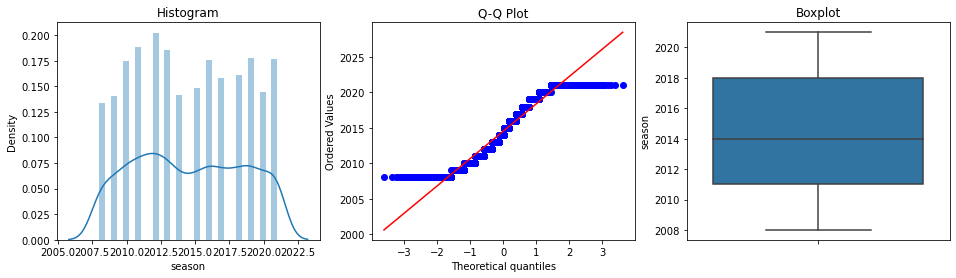

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


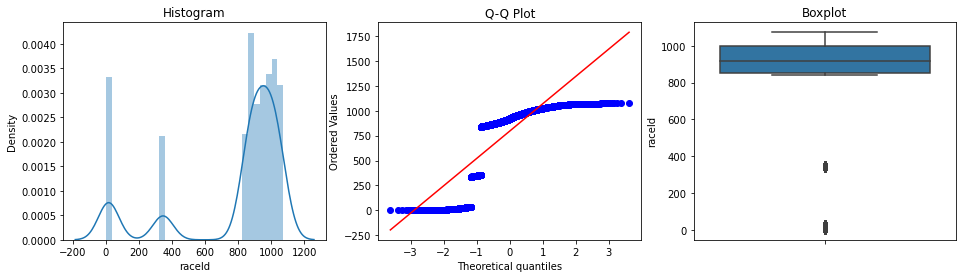

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


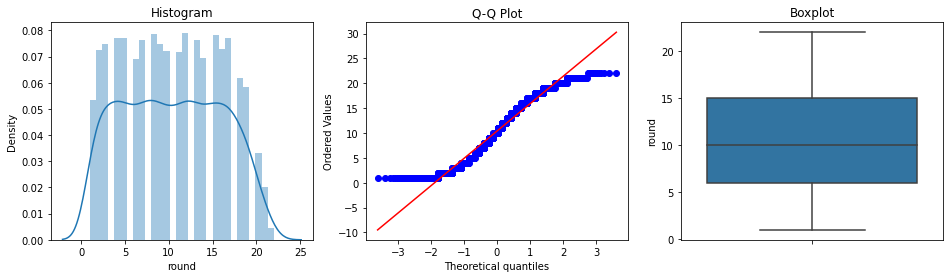

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


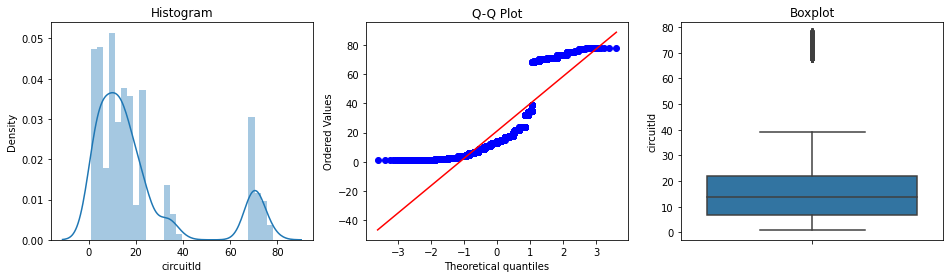

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


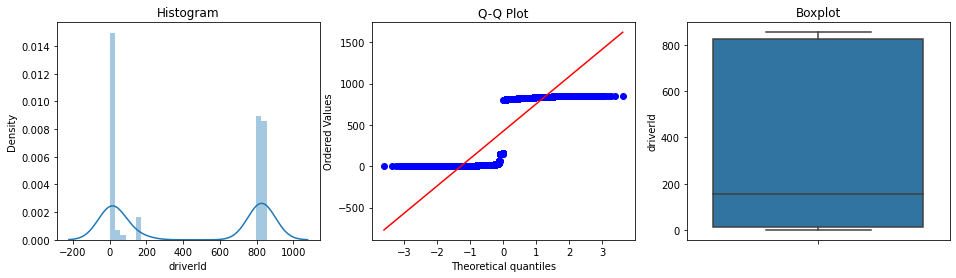

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


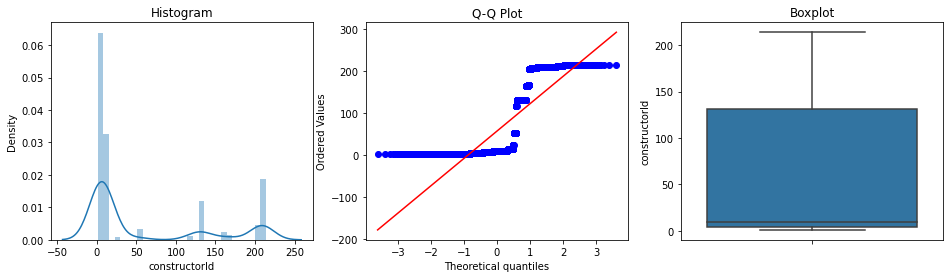

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


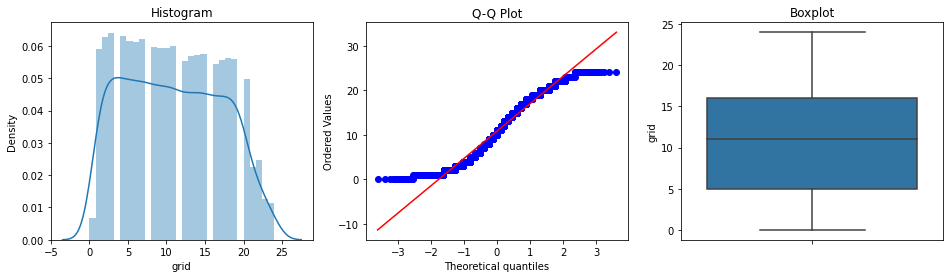

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


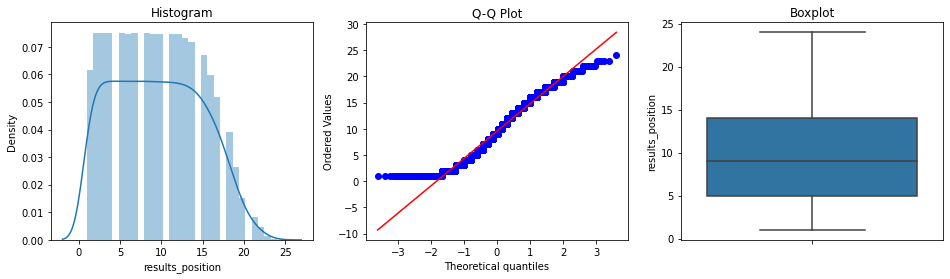

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


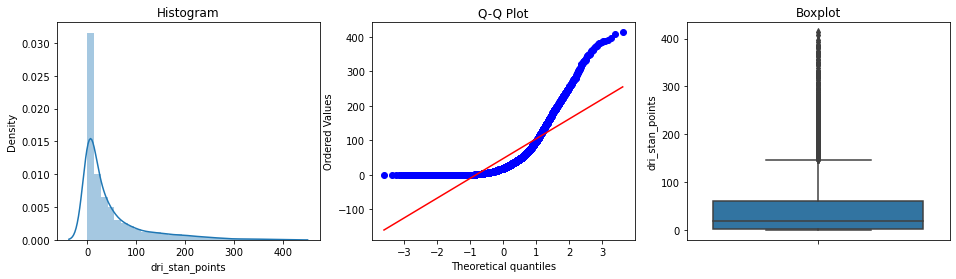

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


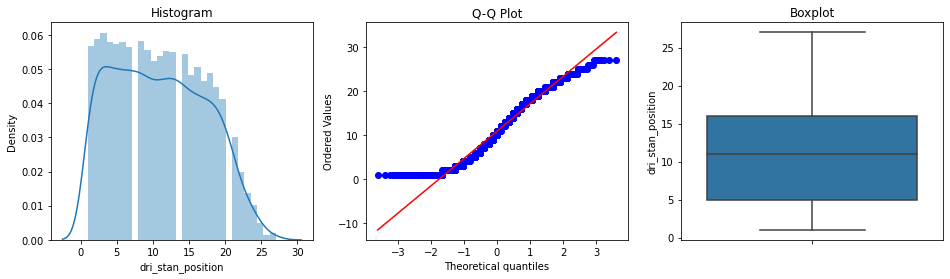

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


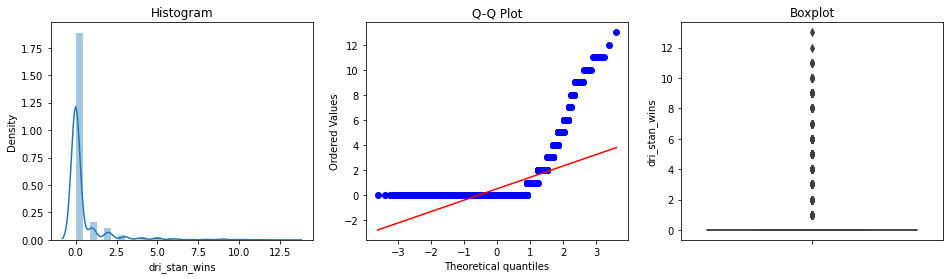

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


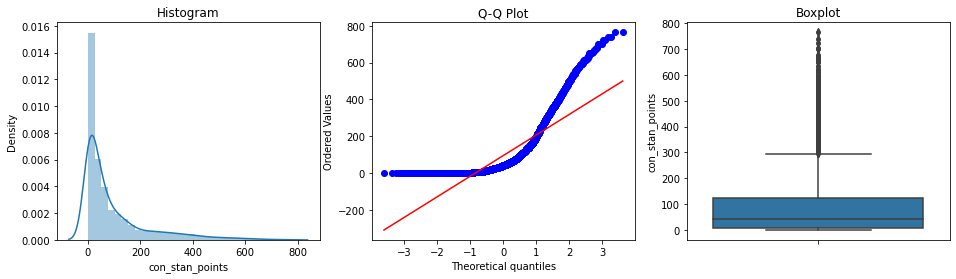

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


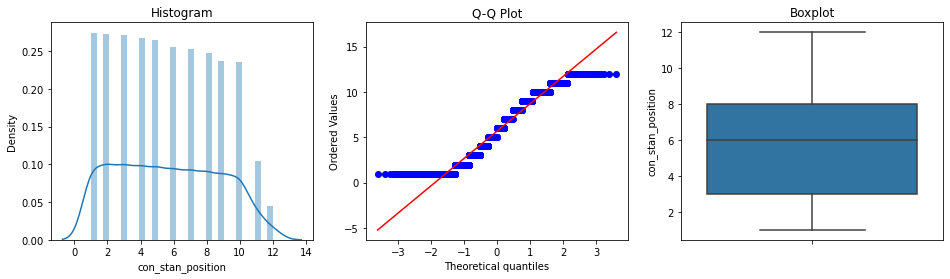

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


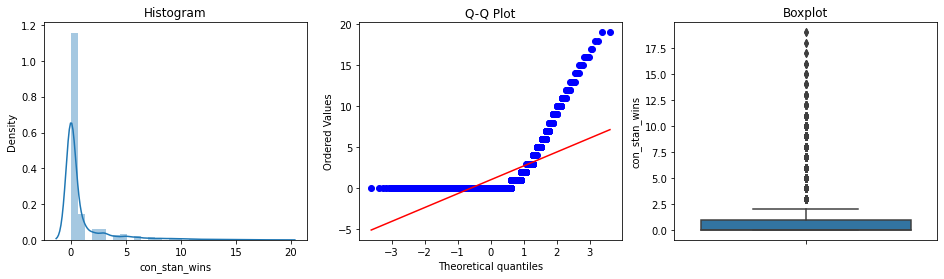

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


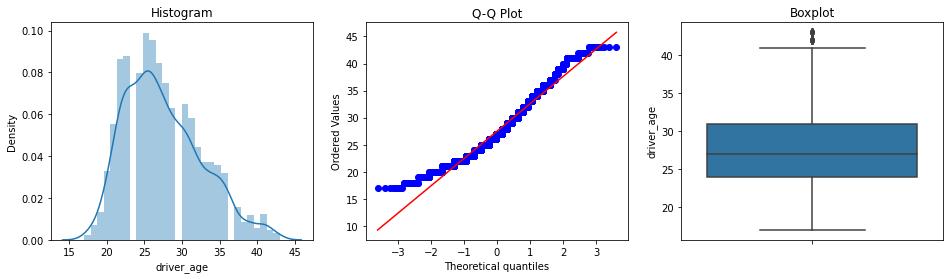

In [55]:
# check original distribution

for i in num_cols:
    diagnostic_plots(data, i)

From the plots above, it can be seen that the dataset contains alot of outliers. This needs to be rectified as outliers can cause to skewed results, making the results attained less accurate.

 #### 4.3.2 After Transformation <a id="part4.3.2"></a> 
[Back to top](#top)

First, we will initialize the transformer before fitting the transformer to the dataset. Then, we will transform the selected variables, and display the diagnostic plots again to see the difference in the dataset.

In [56]:
# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = num_cols)

# fit transformer to the dataframe
yjt.fit(data)

YeoJohnsonTransformer(variables=['season', 'raceId', 'round', 'circuitId',
                                 'driverId', 'constructorId', 'grid',
                                 'results_position', 'dri_stan_points',
                                 'dri_stan_position', 'dri_stan_wins',
                                 'con_stan_points', 'con_stan_position',
                                 'con_stan_wins', 'driver_age'])

In [57]:
# transform indicated variables

data = yjt.transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


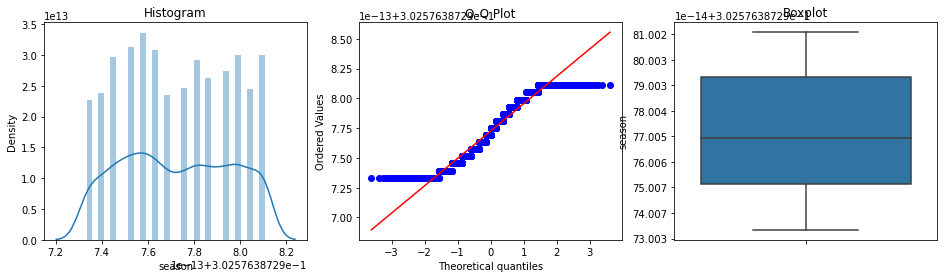

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


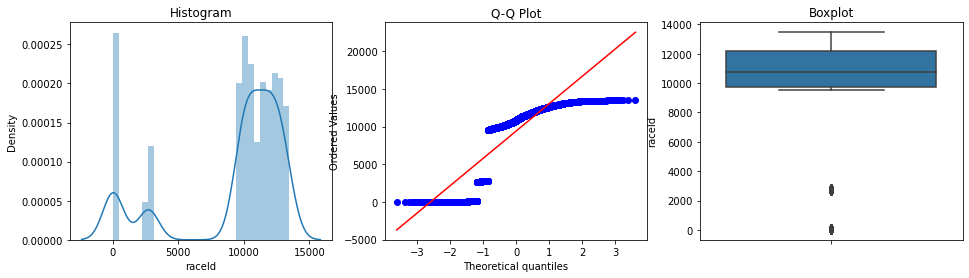

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


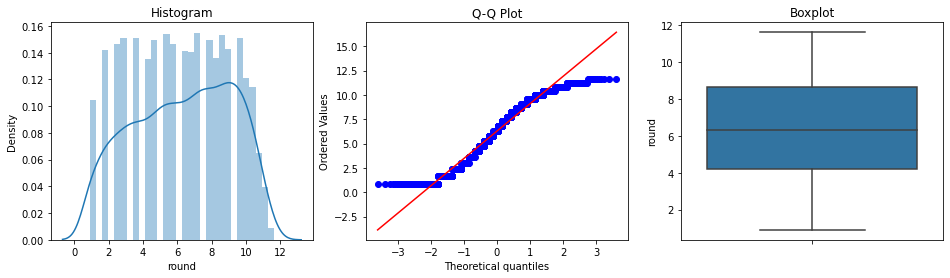

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


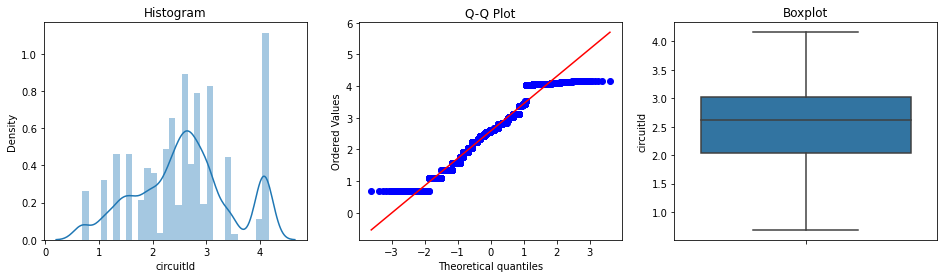

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


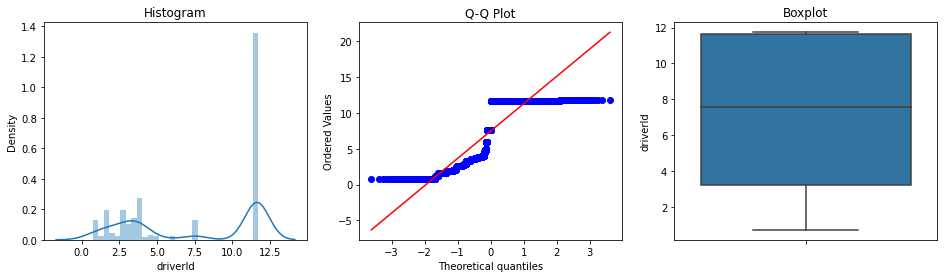

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


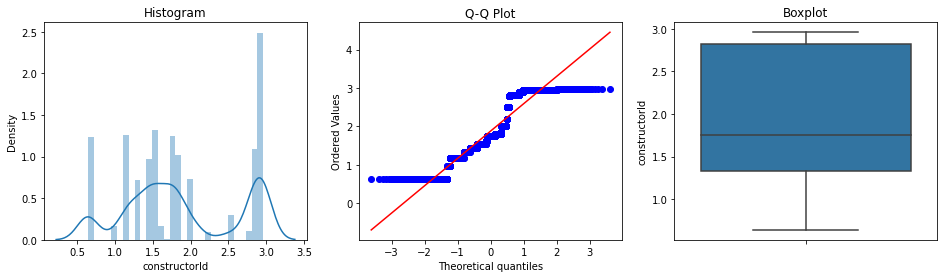

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


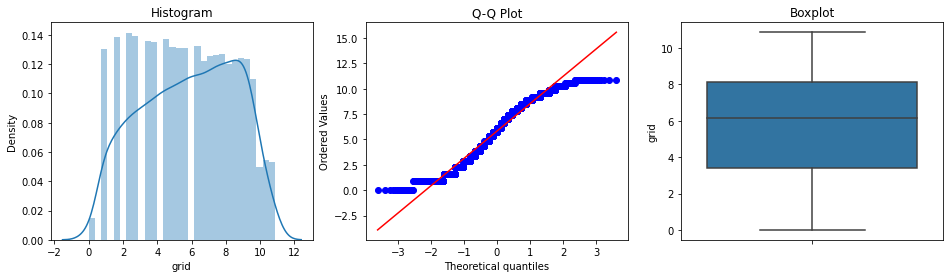

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


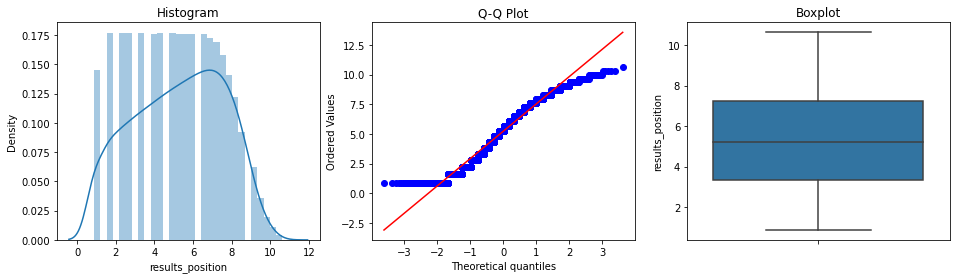

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


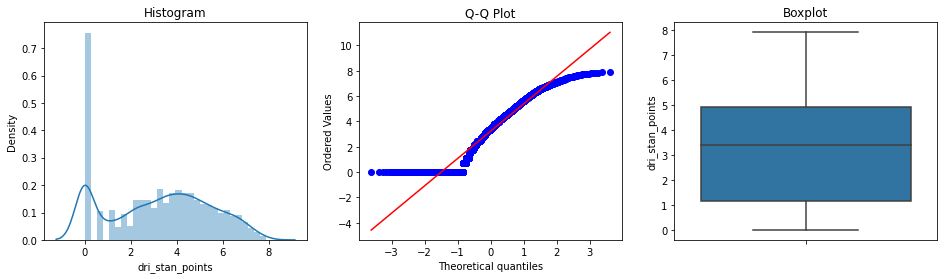

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


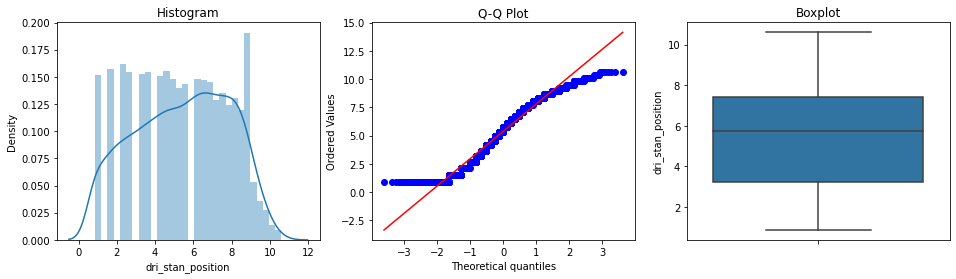

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


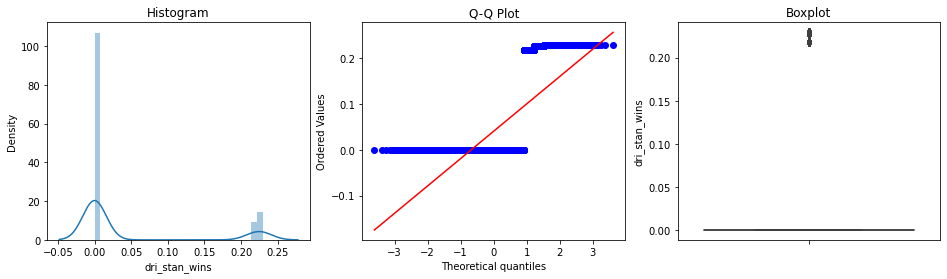

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


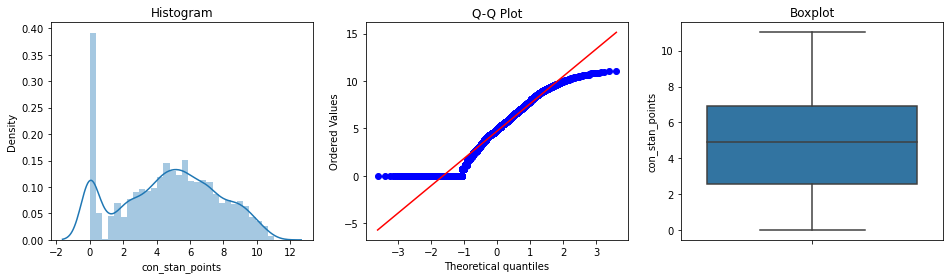

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


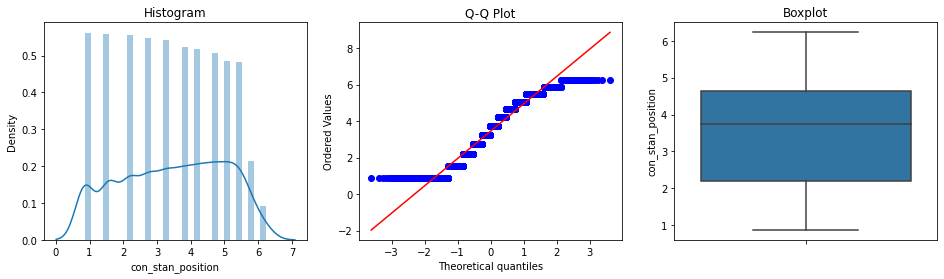

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


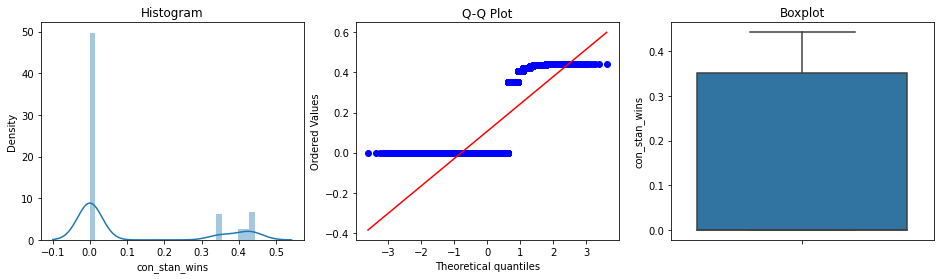

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


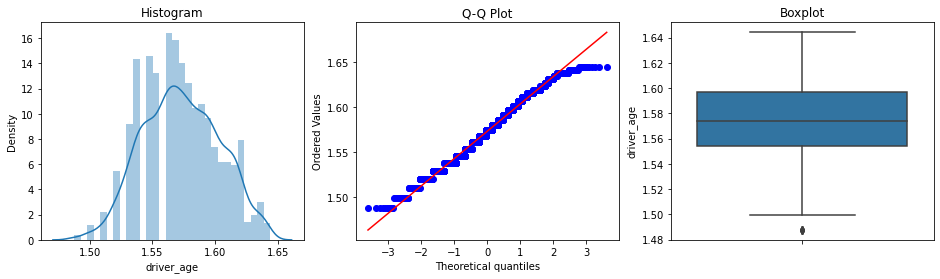

In [58]:
# check new distribution

for i in num_cols:
    diagnostic_plots(data, i)

As seen above, the outliers that were previously seen in the plots are no longer visible as they have been successfully removed from the dataset.

### 4.4 Categorical Data Encoding<a id="part4.4"></a> 
[Back to top](#top)

Encoding Categorical Data is another essential facet of Machine Learning. Categorical variables are essentially variables that are usually discrete and uncontinuous. As our data currently contains multiple categorical variable that can't be used by the Regression Model, we are required to encode the Categorical Data. There are multiple variations of Categorical Data Encoding. The one we are going to use goes by the name of One Hot Encoding which represent a categorical variable as a group of binary variables, where each binary variable represents one category. The binary variable indicates whether the category is present in an observation (1) or not (0).

First, we will create the one hot encoder, then fit the encoder to the X_train set. We will then transform, the train and test sets before displaying the preview of the X_train sets using the X_train.head() function.

In [59]:
X_test.isnull().sum()

season               0
raceId               0
round                0
circuitId            0
driverId             0
constructorId        0
grid                 0
nationality          0
driverName           0
constructorRef       0
dri_stan_points      0
dri_stan_position    0
dri_stan_wins        0
con_stan_points      0
con_stan_position    0
con_stan_wins        0
driver_age           0
dtype: int64

In [60]:
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
cat_cols

['nationality', 'driverName', 'constructorRef']

In [61]:
# let's create the encoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=False)

In [62]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(X_train)

OneHotEncoder()

In [63]:
# we can see which variables the encoder will encode

ohe_enc.variables

In [64]:
# let's transform train and test set

X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(


In [65]:
# let's inspect the encoded train set

X_train.head()

,season,raceId,round,circuitId,driverId,constructorId,grid,dri_stan_points,dri_stan_position,dri_stan_wins,...,constructorRef_manor,constructorRef_alphatauri,constructorRef_alpine,constructorRef_lotus_f1,constructorRef_toyota,constructorRef_racing_point,constructorRef_brawn,constructorRef_aston_martin,constructorRef_honda,constructorRef_super_aguri
6940,2021.0,1067,16,5,844,6,3,116.0,7,0,...,0,0,0,0,0,0,0,0,0,0
10196,2017.0,971,3,3,815,10,18,14.0,8,0,...,0,0,0,0,0,0,0,0,0,0
2123,2017.0,972,4,71,840,3,11,0.0,16,0,...,0,0,0,0,0,0,0,0,0,0
11080,2009.0,10,10,11,2,2,15,6.0,13,0,...,0,0,0,0,0,0,0,0,0,0
10133,2015.0,937,11,13,815,10,4,25.0,11,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# let's inspect the encoded test set

X_test.head()

,season,raceId,round,circuitId,driverId,constructorId,grid,dri_stan_points,dri_stan_position,dri_stan_wins,...,constructorRef_manor,constructorRef_alphatauri,constructorRef_alpine,constructorRef_lotus_f1,constructorRef_toyota,constructorRef_racing_point,constructorRef_brawn,constructorRef_aston_martin,constructorRef_honda,constructorRef_super_aguri
11644,2015.0,945,19,24,826,9,9,95.0,7,0,...,0,0,0,0,0,0,0,0,0,0
3106,2018.0,1003,15,15,840,3,20,6.0,17,0,...,0,0,0,0,0,0,0,0,0,0
13109,2011.0,855,15,22,817,164,22,0.0,27,0,...,0,0,0,0,0,0,0,0,0,0
44,2008.0,24,7,7,18,11,20,3.0,16,0,...,0,0,0,0,0,0,0,0,1,0
9101,2016.0,959,12,10,1,131,2,217.0,1,6,...,0,0,0,0,0,0,0,0,0,0


### 4.5 Variable Discretization/Binning<a id="part4.5"></a> 
[Back to top](#top)

Discretization refers to the process through which we transform continuous variables, models and functions into a discrete form. We can do this by creating a series of regular intervals (or bins) across the range of our desired variable. It also becomes easier to understand continuous data when split into regular intervals. Just like there are various ways to do Categorical Encoding, there are multiple ways to conduct Variable Discretization/Binning. We are going to use Equal Width Discretization, which usually entails separating all the values into `n` number of bins, each of them having the same width as one another. First, we will initiate the Equal Width Discretisizer before fitting it to the X_train_enc. We will then transform the train and test sets, followed by creating a method called DisplayProportions that shows the percetage of observations per bin for each numerical variable.

In [67]:
num_variables = ['season', 'raceId', 'round', 'circuitId', 'driverId', 'constructorId',
                'grid', 'dri_stan_points', 'dri_stan_position', 'dri_stan_wins', 'con_stan_points',
                'con_stan_position', 'con_stan_wins', 'driver_age']

In [68]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualWidthDiscretiser(
    bins=10, variables = num_variables, return_object=True)

disc.fit(X_train)

EqualWidthDiscretiser(return_object=True,
                      variables=['season', 'raceId', 'round', 'circuitId',
                                 'driverId', 'constructorId', 'grid',
                                 'dri_stan_points', 'dri_stan_position',
                                 'dri_stan_wins', 'con_stan_points',
                                 'con_stan_position', 'con_stan_wins',
                                 'driver_age'])

In [69]:
X_train.dtypes

season                         float64
raceId                           int64
round                            int64
circuitId                        int64
driverId                         int64
                                ...   
constructorRef_racing_point      int32
constructorRef_brawn             int32
constructorRef_aston_martin      int32
constructorRef_honda             int32
constructorRef_super_aguri       int32
Length: 146, dtype: object

In [70]:
# transform train and test sets

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [71]:
train_t.dtypes

season                         object
raceId                         object
round                          object
circuitId                      object
driverId                       object
                                ...  
constructorRef_racing_point     int32
constructorRef_brawn            int32
constructorRef_aston_martin     int32
constructorRef_honda            int32
constructorRef_super_aguri      int32
Length: 146, dtype: object

In [72]:
# create a method to first calculate, then display the proportion of observations per interval

def DisplayProportions(category, train_set, test_set):
    
    # calculate proportion of observations per interval
    t1 = train_set.groupby(category)[category].count() / len(train_t)
    t2 = test_set.groupby(category)[category].count() / len(test_t)
    
    # concatenate aggregated views
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']

    # plot
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Percentage of observations per bin')

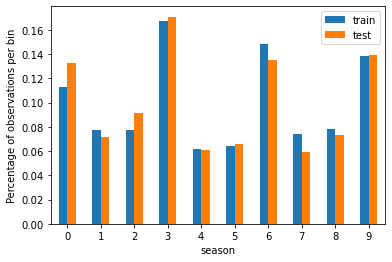

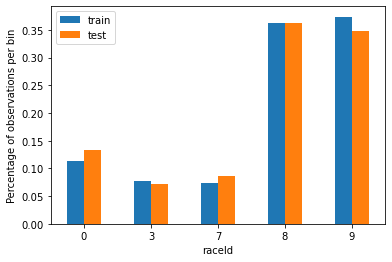

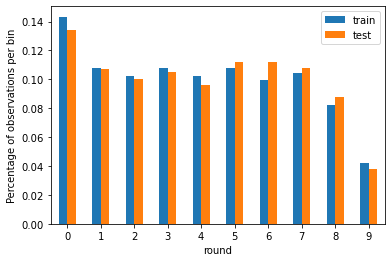

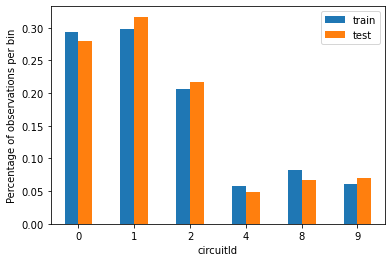

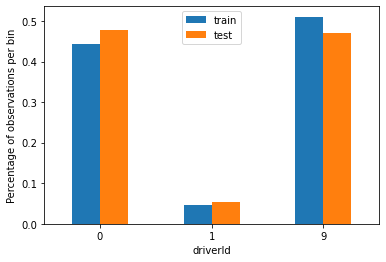

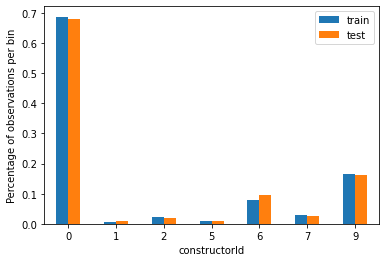

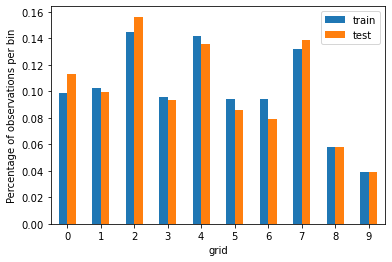

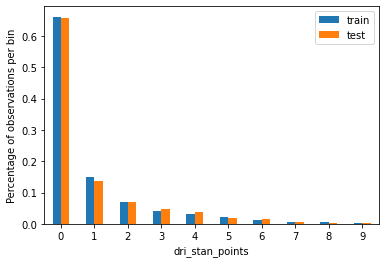

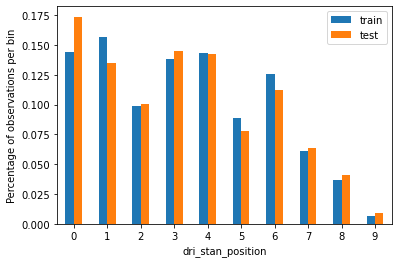

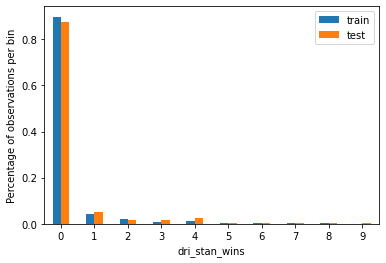

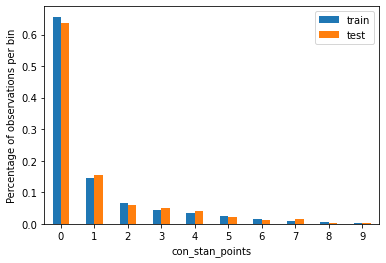

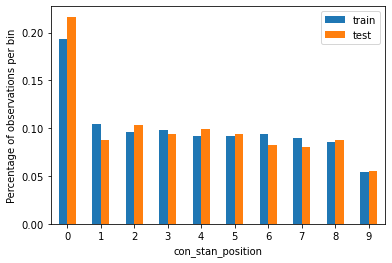

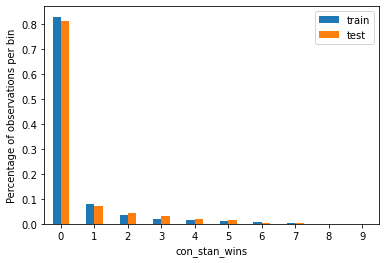

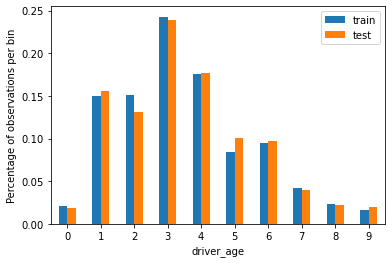

In [73]:
for i in num_variables:
    DisplayProportions(i, train_t, test_t)

### 4.6. Feature Engineer<a id="part4.6"></a> 
[Back to top](#top)

Feature scaling in machine learning is one of the most integral actions needed to be done during the pre-processing of data before creating a machine learning model as it can cause the variation between a weak machine learning model and a better one. Machine Learning Algorithms such as Linear Regression require the use of Gradient Descent. They require its use as it acts a Optimization Technique which in turns needs data to be scaled. The image below shows the formula for Gradient Descent.

For this assignment, we wil be use the Standardisation technique to conduct feature scaling. Standardisation refers to another scaling technique where the values are centered around the mean with a unit standard deviation. This results in the mean of the attribute becoming 0 and the resultant distribution in having a unit standard deviation. 

First, we will set up the StandardScaler before fitting the scaler to train_t. Then, we will transform the train and test sets. After completing Standard Scaling, we will create a method called PlotScale to show 2 plots, Before Scaling and After Scaling, which serves as a way to prove that the data has undergone Feature Scaling. Before creating the method, however, we will first transform the train and test sets to dataframes.

In [74]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_t)

# transform train and test sets
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)

In [75]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [76]:
def PlotScale(train_set, column_name, train_scaled):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    for column in column_name:
        sns.kdeplot(train_set[column], ax=ax1, label =column)
        sns.kdeplot(X_train[column], ax=ax2, label =column)
        
    #before scaling
    ax1.set_title('Before Scaling')
    ax1.legend()
    
    #after scaling
    ax2.set_title('After Scaling')
    ax2.legend()
    
    plt.show()

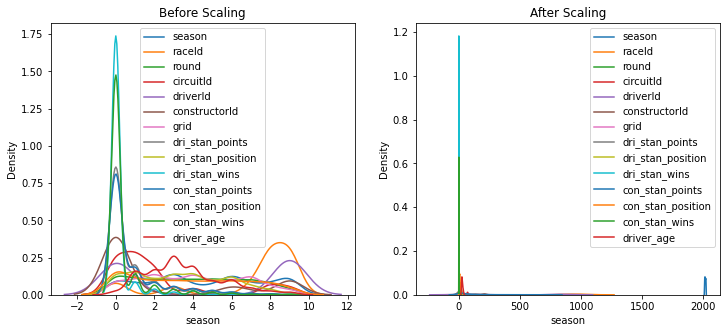

In [77]:
PlotScale(train_t, num_variables, X_train_scaled)

## 5. Machine Learning Model <a id="part5"></a> 
[Back to top](#top)

As we have now succesfully conducted various Data Wrangling and Data Cleaning and Transformation Techniques, we can now build the Machine Learning Model. As our prediction problem is a Regression problem, a Regression model needs to be built. Hence, a Linear Regression Model is to be built. We also need to build a Naive Baseline Model, which will be built before the Linear Regression Model.

However, before we build both the Naive Baseline Model and the Linear Regression Model, we need to first state the number of rows and columns in our final dataset. This will help show that the predictions are not trivial nor unrealistic.

### 5.1 Count of Rows and Columns <a id="part5.1"></a>
[Back to top](#top)

As seen below, the various datasets contain a minimum of 1376 rows and at least 1 column, showing that the datasets are not small ones. Hence, as they are big datasets, it can be understood that the predictions made will not be trivial or unrealistic.

In [78]:
#rows and columns

X_train_scaled.shape

(3209, 146)

In [79]:
y_train.shape

(3209,)

In [80]:
X_test_scaled.shape

(1376, 146)

In [81]:
y_test.shape

(1376,)

### 5.2 Naive Baseline Model <a id="part5.2"></a>
[Back to top](#top)

In order to evaluate the model performance, a range of metrics can be used, but in this Assignment we will focus on only 3:

- Mean Square Error (MSE): The MSE is the average squared difference between the predicted values and the actual values in a dataset. The lower the MSE, the better said model fits a dataset.

- Root Mean Square Error (RMSE): The RMSE is the square root of the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of RMSE indicate better fit and model performance.

- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

Then, we will import all the necessary packages required for the Naive Baseline Model. Upon importing all the packages that are necessary, we will build the Naive Baseline Model.

In [82]:
import numpy as np
from scipy import stats

# pick the mean target value from all of train data
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

9.627921470863198
The train mean target value is 9.63.


In [83]:
y_train_preds_naive = [round(mean_target_value,2) for row in X_train_scaled.iloc[:,0]]
y_train_preds_naive[0:5]

[9.63, 9.63, 9.63, 9.63, 9.63]

In [84]:
# insert code here
y_test_preds_naive = [round(mean_target_value,2) for row in X_test_scaled.iloc[:,0]]
y_test_preds_naive[0:5]

[9.63, 9.63, 9.63, 9.63, 9.63]

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")

The Naive Baseline Model's MSE on train data is 27.82.
The Naive Baseline Model's MSE on test data is 28.79.

The Naive Baseline Model's RMSE on train data is 5.27.
The Naive Baseline Model's RMSE on test data is 5.37.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


As seen above, the results of the Naive Baseline Model are significantly low. The MSE results attained for the train and test sets are `27.82` and `28.79` respectively, while the RMSE results are `5.27` and `5.37` respectively. As both values are small, it means that the dataset fits the model well. However, the R2 results for both, the train and test sets are `0.00`. As the R2 values are low, it means that the Naive Baseline Model hasn't performed well and that the predictions made using it cannot be trusted fully. Hence, it can be seen that the Naive Baseline Model results are in fact unsatisfactory despite the dataset used fitting the model well.

### 5.3 Linear Regression Model <a id="part5.3"></a>
[Back to top](#top)

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).

The equation representing this line is as follows:

`Y = a + b * X + e`

In the above equation: a represents the intercept, b represents the slope of the line, while e represents the error term. The accuracy of the machine learning model can be found out through the usage of this method. Despite the fact that this model is immensely popular for the benefits it provides in terms of Data Analysis. One disadvantage of using this method is that it is likely to provide us with less accurate results.

We will be using the same metrics used to test the accuracy of the Naive Baseline Model for the lInear Regression Model as well. The metrics are `MSE`, `RMSE` and `R2`.

In [86]:
linreg = LinearRegression().fit(X_train_scaled, y_train)

In [87]:
y_train_preds_linreg = linreg.predict(X_train_scaled)
y_test_preds_linreg = linreg.predict(X_test_scaled)

In [88]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on train data is {train_mse_linreg:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on test data is {test_mse_linreg:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on train data is {train_rmse_linreg:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on test data is {test_rmse_linreg:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_linreg

train_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on train data is {train_r2_linreg:.4f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_linreg

test_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on test data is {test_r2_linreg:.4f}.")

The LinReg Model's MSE on train data is 8.4754.
The LinReg Model's MSE on test data is 8.7020.

The LinReg Model's RMSE on train data is 2.9113.
The LinReg Model's RMSE on test data is 2.9499.

The LinReg Model's R2 on train data is 0.6954.
The LinReg Model's R2 on test data is 0.6968.


As seen above, the `MSE` value for the train set is `8.4754` while that of the test set is `8.7020`. This means that the test set has overperformed the train set. As the MSE values for both sets are comparatively low, it means that the datasets fit the Linear Regression Model really well. Moreover, as the test set's MSE was higher than the train set's MSE, there is a chance that overfitting could have occured. However, as the values are not too far apart, the train and test set's distribution of predictions are more similar than they are different.

The `RMSE` value for the train set is `2.9113` while that of the test set is `2.9499`. Thus the test set has overperformed the train set in terms of RMSE as well. As both values are very low, they definitely fit the model really well. However, similar to the MSE values, there is a chance that overfitting occured for the test set.

The `R2` value for the train set is `0.6954` while that of the test set is `0.6968`. As both values are close to the maximum value of `1`, it means that the model has performed really well and that the train and test sets are in fact very similar to one another to the points where they are basically more similar than they are different.  

Thus as the MSE AND RMSE values for the Linear Regression Model were lower than that of the Naive Baseline Model, the datsets fit the Linear Regression Model better than the Naive Baseline one. Moreover, as the R2 value was higher for the Linear Regression Model was way higher for the Linear Regression Model in comparison to the Naive Baseline Model, the Linear Regression model has performed significantly better than the Naive Baseline one.

Therefore, the dataset was a good fit for the Linear Regression model and the model has performed well. However, that does not mean that they could not have performed better, especially because there is a high chance that overfitting has taken place for the test set.

## 6 Predictions <a id="part6"></a>
[Back to top](#top)

As we have successfully built the Linear Regression Model and achieved good results for the metrics that measured the performance of the model and the quality of fitting for the datasets, we can now carry out the Predictions.

Using the `.predict` function, we can create a new array that contains the predicted values. We will then create a dataframe called `predictions` which consists of 2 columns. `Actual` which contains the actual results_position values and `Predicted` that contains the predicted values. This is done to compare both values and see how accurate the results are.

In [89]:
y_pred = linreg.predict(X_test_scaled)
y_pred = y_pred.round()

predictions = pd.DataFrame(data={'Actual': y_test, 'Predicted': y_pred})

predictions.head(50)

,Actual,Predicted
11644,10,8.0
3106,14,16.0
13109,22,19.0
44,11,14.0
9101,1,2.0
23213,17,19.0
40,11,11.0
11820,5,7.0
5354,3,5.0
8791,15,16.0


## 7. Summary and Further Improvements <a id="part7"></a> 
[Back to top](#top)

In this report, we conducted Data Wrangling techniques and Data Cleansing and Transformation techniques on a Formula One dataset to build a Naive Baseline Model and a predictive Linear Regression model that returned us with the MSE, RMSE and R2 values. The `MSE` metric for the Tests set achieved a really good score of `8.7020` and the `RMSE` metric also attained a good score of `2.9499` which means the dataset fit the `Linear Regression` model really well. The `R2` metric achieved a good score of `0.6968`, highlighting that the `Linear Regression model` performed really well.

However, just like everything else in life, the results can still be improved further. Firstly, there is a very high chance that `Overfitting` has taken place for the test set as the `MSE`, `RMSE` and `R2` values for the Test set was higher than that of the Train set. This has to be prevented in the future when I make use of Linear Regression Models. Furthermore, I did not make use of any `Additional Mathematical Computations`, which perhaps could have led to a better overall model performance. Therefore, these are the improvements I would make to this model.